In [8]:
from langgraph.graph import StateGraph ,START,END
from typing import TypedDict,Literal,Annotated
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage,BaseMessage,HumanMessage
from langgraph.graph.message import add_messages
from typing import Annotated  
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")

In [3]:
class State(TypedDict):
    topic:str
    joke:str
    detail:str

In [4]:
def joke(state:State):
    prompt=f"make joke of this topic {state['joke']}"
    responce=llm.invoke(prompt).content
    return{'joke':responce}

In [5]:
def detail(state:State):
    prompt=f"explain this joke {state['joke']}"
    responce=llm.invoke(prompt).content
    return{'detail':responce}

In [9]:
cheackpointer=InMemorySaver()
graph=StateGraph(State)
graph.add_node('joke',joke)
graph.add_node('detail',detail)
graph.add_edge(START,'joke')
graph.add_edge('joke','detail')
graph.add_edge('detail',END)
workflow=graph.compile(checkpointer=cheackpointer)

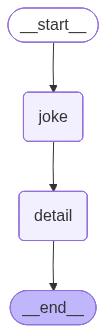

In [10]:
workflow